# AKONA CIKO: Agricultural _Dataset _Project

## Table of Contents

1. Project Overview
2. Dataset details
3. Packages & Libraries
4. Data Pre-processsing & Processing
5. Exploratory Data Analysis (EDA) & Statistics
6. Regression Models
7. Data Visualization
8. Results & Insights 
9. Project Manager / Contributor

#### Requirements.txt_file:

#### 1. Project Overview:

#### 2. Dataset details:

#### 3. Packages & Libraries:

##### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

#### 4. Data Pre-processing & Processing:

##### Ignore warning(s) _for a cleaner notebook

In [3]:
# Code that allows us to ignore 'warnings', just incase they pop_up:

import warnings 
warnings.filterwarnings('ignore')

##### Load dataset_

In [4]:
agric_set = pd.read_csv("co2_emissions_from_agri.csv")

##### Dataset successfully loaded_

In [4]:
agric_set.head(5)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


###### Checking last 3 rows of dataset_

In [6]:
agric_set.tail(3)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,...,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


##### Handling of leading / trailling spaces_

In [7]:
# Code checks & trims leading and or trailing spaces:
agric_set.columns= agric_set.columns.str.strip()
print(agric_set.columns)

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


##### Important info regarding dataset_

In [8]:
# More info of the dataset:
agric_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

##### Looking for Nulls / Missing values / Blanks in our dataset_

In [9]:
# Null values that appear on each feature or column:
agric_set.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


##### Percentage_(%) of features with null values_

In [14]:
# Percentage of features with null values :
null_counts = agric_set.isnull().sum()

total_columns = agric_set.shape[1]
null_features_count = (null_counts > 0).sum()
null_features_percentage = (null_features_count / total_columns) * 100

print(f"Percentage of features with Null values: {null_features_percentage:.2f}%")

Percentage of features with Null values: 35.48%


#### Feature Engineering _ Deployment of different techniques for handling missing values / nulls:

##### 1. Imputation with median _savanna fires

In [15]:
# Skewness and Kurtosis technique for "Savanna fires" column:
skewness = agric_set['Savanna fires'].skew()
kurtosis = agric_set['Savanna fires'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 10.347116822388163
Kurtosis: 157.12347335007266


In [20]:
# Since the data is not normally distributed & is extremely right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Savanna fires'].fillna(agric_set['Savanna fires'].median(), inplace= True)

# Verify if this indeed worked ???
agric_set.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                         0
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [25]:
# Rounding to nearest integer:
agric_set['Savanna fires'] = agric_set['Savanna fires'].round()

##### 2. Imputation with median _forest fires

In [28]:
from scipy.stats import shapiro

# Shapiro-Wilk test:
stat, p = shapiro(agric_set['Forest fires'].dropna())

# Intepret the result:
if p > 0.05:
    print('The data is normally distributed (Fail to reject HO)')
else:
    print('The data is not normally distributed (Reject HO)')

The data is not normally distributed (Reject HO)


In [35]:
# Since the data is NOT normally distributed, using the median imputation is generally more appropriate:
agric_set['Forest fires'].fillna(agric_set['Forest fires'].median(), inplace= True)

# Rounding to nearest integer:
agric_set['Forest fires'] = agric_set['Forest fires'].round()

##### 3. Imputation with median _crop residuals

In [41]:
# Skewness and Kurtosis technique for "Crop Residues" column:
skewness = agric_set['Crop Residues'].skew()
kurtosis = agric_set['Crop Residues'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.105082438285656
Kurtosis: 39.239780020520875


In [44]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Crop Residues'].fillna(agric_set['Crop Residues'].median(), inplace= True)

# Rounding to nearest integer:
agric_set['Crop Residues'] = agric_set['Crop Residues'].round()

#### 4. Regression Imputation _forestland

In [ ]:
Regression Imputation:

from sklearn.linear_model import LinearRegression

# Seperate rows with missing values:
missing_forestland = agric_set['Forestland'].isnull()

# Regression model training on rows without missing values:
reg = LinearRegression()
reg.fit(agric_set.loc[~missing_forestland, ['Food Transport', 'Food Retail']], agric_set.loc[~missing_forestland, 'Forestland'])

# Predict missing values:
agric_set.loc[missing_forestland, 'Forestland'] = reg.predict(agric_set.loc[missing_forestland, ['Food Transport', 'Food Retail']])

In [53]:
agric_set['Forestland'] = agric_set['Forestland'].round()

#### 5. Imputation with median _net forest conversion

In [55]:
# Skewness and Kurtosis technique for "Net Forest conversion" column:
skewness = agric_set['Net Forest conversion'].skew()
kurtosis = agric_set['Net Forest conversion'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 11.77165033927154
Kurtosis: 157.78022563919293


In [58]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Net Forest conversion'].fillna(agric_set['Net Forest conversion'].median(), inplace= True)

# Rounding off for consistency:
agric_set['Net Forest conversion'] = agric_set['Net Forest conversion'].round()

#### 6. Imputation with median _food household consumption

In [60]:
# Skewness and Kurtosis technique for "Food Household Consumption" column:
skewness = agric_set['Food Household Consumption'].skew()
kurtosis = agric_set['Food Household Consumption'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 11.356973350891558
Kurtosis: 152.4137544204516


In [62]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Food Household Consumption'].fillna(agric_set['Food Household Consumption'].median(), inplace= True)

# Rounding off for consistency:
agric_set['Food Household Consumption'] = agric_set['Food Household Consumption'].round()

#### 7. Regression Imputation _IPPU

In [10]:
from sklearn.linear_model import LinearRegression

missing_ippu = agric_set['IPPU'].isnull()

# Train a regression model on rows without missing values:
reg = LinearRegression()
reg.fit(agric_set.loc[~missing_ippu, ['Food Processing', 'Manure left on Pasture']], agric_set.loc[~missing_ippu, 'IPPU'])

# Predict missing values for IPPU:
agric_set.loc[missing_ippu, 'IPPU'] = reg.predict(agric_set.loc[missing_ippu, ['Food Processing', 'Manure left on Pasture']])

##### Apply Constraints on Predictions:

In [12]:
# Replace negative predictions with 0
predictions = reg.predict(agric_set.loc[missing_ippu,  ['Food Processing', 'Manure left on Pasture']])
predictions = [max(0, value) for value in predictions] # Replace negatives with 0

# Fill in the missing values with the adjusted predictions:
agric_set.loc[missing_ippu, 'IPPU'] = predictions

Now, let's standardise (round_off) the data (IPPU _feature)

In [15]:
# Rounding off for consistency:
agric_set['IPPU'] = agric_set['IPPU'].round()

#### 8. Imputation with median _manure applied to soils

In [17]:
# Skewness and Kurtosis technique for "Manure applied to Soils" column:
skewness = agric_set['Manure applied to Soils'].skew()
kurtosis = agric_set['Manure applied to Soils'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.577909447402731
Kurtosis: 48.33442527360179


In [20]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Manure applied to Soils'].fillna(agric_set['Manure applied to Soils'].median(), inplace= True)

# Round_off to maintain consistency:
agric_set['Manure applied to Soils'] = agric_set['Manure applied to Soils'].round()

#### 9. Imputation with median _manure management

In [23]:
# Skewness and Kurtosis technique for "Manure management" column:
skewness = agric_set['Manure Management'].skew()
kurtosis = agric_set['Manure Management'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 6.336032598821295
Kurtosis: 42.6660180333373


In [24]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Manure Management'].fillna(agric_set['Manure Management'].median(), inplace = True)

# Round_off values:
agric_set['Manure Management'] = agric_set['Manure Management'].round()

#### 10. Imputation with median _fires in humid tropical forests

In [26]:
# Skewness and Kurtosis technique for "Fires in humid tropical forests" column:
skewness = agric_set['Fires in humid tropical forests'].skew()
kurtosis = agric_set['Fires in humid tropical forests'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 7.045352619346373
Kurtosis: 56.95834975998129


In [27]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['Fires in humid tropical forests'].fillna(agric_set['Fires in humid tropical forests'].median(), inplace = True)

# Round_off values:
agric_set['Fires in humid tropical forests'] = agric_set['Fires in humid tropical forests'].round()

#### 11. Imputation with median _on-farm energy use

In [30]:
# Skewness and Kurtosis technique for "On-farm energy use" column:
skewness = agric_set['On-farm energy use'].skew()
kurtosis = agric_set['On-farm energy use'].kurt()

# Skewness near 0 indicates Normal distribution
# Skewness > 0, Right skewed
# While Skewness < 0, Left skewed
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 8.62318307632979
Kurtosis: 95.48875239373888


In [31]:
# Since the data is NOT normally distributed & is right skewed, using the median would be more robust approach for imputing missing values:
agric_set['On-farm energy use'].fillna(agric_set['On-farm energy use'].median(), inplace = True)

# Round_off values:
agric_set['On-farm energy use'] = agric_set['On-farm energy use'].round()

### Standardize all column names to lower_cases for consistency:

In [33]:
agric_set.columns = agric_set.columns.str.lower().str.replace(' ', '_')

In [35]:
# Rename specific columns:
agric_set.rename(columns= {
           'total_population_-_male': 'total_population - male',
           'total_population_-_female': 'total_population - female'
}, inplace = True)

#### 5. Exploratory Data Analysis (EDA) & Statistics:

Stats for each feature / column within our dataset. ...

In [40]:
# Stats for each column name:
Agric_columns = ['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils_(co2)',
       'pesticides_manufacturing', 'food_transport', 'forestland',
       'net_forest_conversion', 'food_household_consumption', 'food_retail',
       'on-farm_electricity_use', 'food_packaging',
       'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on-farm_energy_use',
       'rural_population', 'urban_population', 'total_population - male',
       'total_population - female', 'total_emission',
       'average_temperature_°c']

Agric_summary = agric_set[Agric_columns].describe()
print(Agric_summary)

              year  savanna_fires  forest_fires  crop_residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       rice_cultivation  drained_organic_soils_(co2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for Visualizations_
sns.set(style = "whitegrid")

##### 1. Top Emission Sources in Total Emission_ IPPU & Net forest conversion.

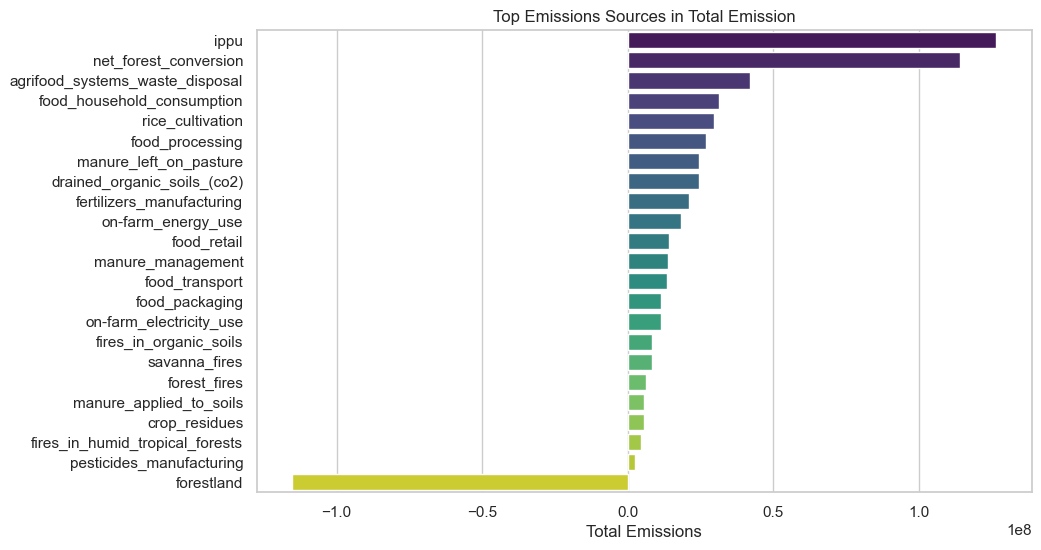

In [45]:
# Summing emissions by source columns_
source_columns = ['savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation',
                  'drained_organic_soils_(co2)', 'pesticides_manufacturing', 'food_transport',
                  'forestland', 'net_forest_conversion', 'food_household_consumption', 'food_retail',
                  'on-farm_electricity_use', 'food_packaging', 'agrifood_systems_waste_disposal',
                  'food_processing', 'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
                  'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
                  'fires_in_humid_tropical_forests', 'on-farm_energy_use']

emissions_by_source = agric_set[source_columns].sum().sort_values(ascending=False)

# Plot_
plt.figure(figsize=(10, 6))
sns.barplot(x=emissions_by_source.values, y= emissions_by_source.index, palette = "viridis")
plt.title('Top Emissions Sources in Total Emission')
plt.xlabel('Total Emissions')
plt.show()

##### 2. Emission Changes Overtime by Region & Source_ 

In [59]:
# Ensure Correct Data Type for the 'year' feature_
agric_set['year'] =  pd.to_numeric(agric_set['year'], errors= 'coerce')

In [61]:
# Small data check_
sample_data = agric_set[['year', 'forest_fires', 'area']].head(10)
print(sample_data)

   year  forest_fires         area
0  1990           0.0  Afghanistan
1  1991           0.0  Afghanistan
2  1992           0.0  Afghanistan
3  1993           0.0  Afghanistan
4  1994           0.0  Afghanistan
5  1995           0.0  Afghanistan
6  1996           0.0  Afghanistan
7  1997           0.0  Afghanistan
8  1998           0.0  Afghanistan
9  1999           0.0  Afghanistan


In [63]:
# Find rows where year is non-numeric_
non_numeric_years = agric_set[pd.to_numeric(agric_set['year'], errors= 'coerce').isnull()]
print(non_numeric_years)

Empty DataFrame
Columns: [area, year, savanna_fires, forest_fires, crop_residues, rice_cultivation, drained_organic_soils_(co2), pesticides_manufacturing, food_transport, forestland, net_forest_conversion, food_household_consumption, food_retail, on-farm_electricity_use, food_packaging, agrifood_systems_waste_disposal, food_processing, fertilizers_manufacturing, ippu, manure_applied_to_soils, manure_left_on_pasture, manure_management, fires_in_organic_soils, fires_in_humid_tropical_forests, on-farm_energy_use, rural_population, urban_population, total_population - male, total_population - female, total_emission, average_temperature_°c]
Index: []

[0 rows x 31 columns]


Any non-numeric values found (if any at all), will need to drop them. ...

In [64]:
# Drop rows with non-numeric Year values_
agric_set = agric_set[pd.to_numeric(agric_set['year'], errors='coerce').notnull()]

In [66]:
# Check for duplicate rows_
duplicates =  agric_set.duplicated()
print(agric_set[duplicates])

Empty DataFrame
Columns: [area, year, savanna_fires, forest_fires, crop_residues, rice_cultivation, drained_organic_soils_(co2), pesticides_manufacturing, food_transport, forestland, net_forest_conversion, food_household_consumption, food_retail, on-farm_electricity_use, food_packaging, agrifood_systems_waste_disposal, food_processing, fertilizers_manufacturing, ippu, manure_applied_to_soils, manure_left_on_pasture, manure_management, fires_in_organic_soils, fires_in_humid_tropical_forests, on-farm_energy_use, rural_population, urban_population, total_population - male, total_population - female, total_emission, average_temperature_°c]
Index: []

[0 rows x 31 columns]


In [67]:
agric_set = agric_set.drop_duplicates()

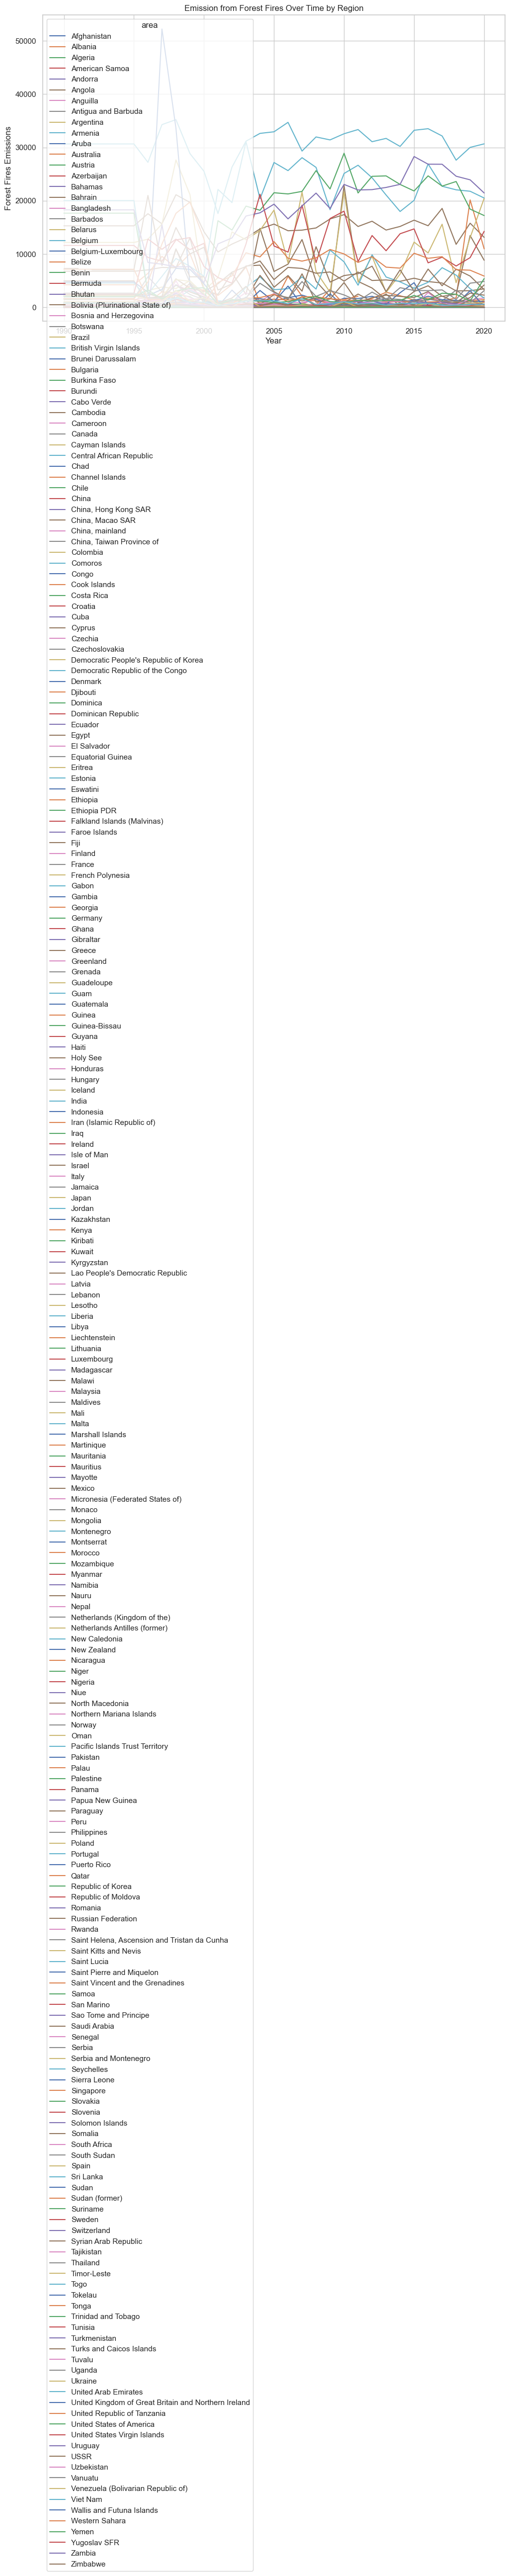

In [71]:
import matplotlib.pyplot as plt

# Attempting to plot once again_
plt.figure(figsize=(12, 8))
for area in agric_set['area'].unique():
    subset = agric_set[agric_set['area'] == area]
    plt.plot(subset['year'], subset['forest_fires'], label= area)

plt.title('Emission from Forest Fires Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Forest Fires Emissions')
plt.legend(title='area')
plt.show()

#### 3. Relationship Between Agricultural Practices and Total Emission_

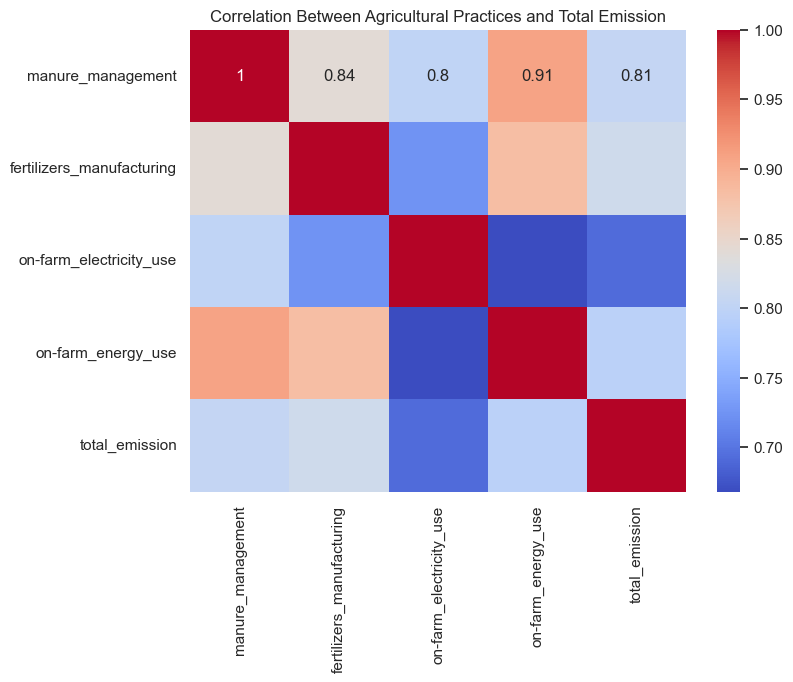

In [73]:
# Correlation heatmap between selected agricultural practices and total emission_
practice_columns = ['manure_management', 'fertilizers_manufacturing', 'on-farm_electricity_use', 
                    'on-farm_energy_use', 'total_emission']
correlation_data = agric_set[practice_columns].corr()

# Plot heatmap_
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Agricultural Practices and Total Emission')
plt.show()

#### 4. Industrial vs Natural Emissions_

Comparing emissions from industrial activities to natural sources. ....

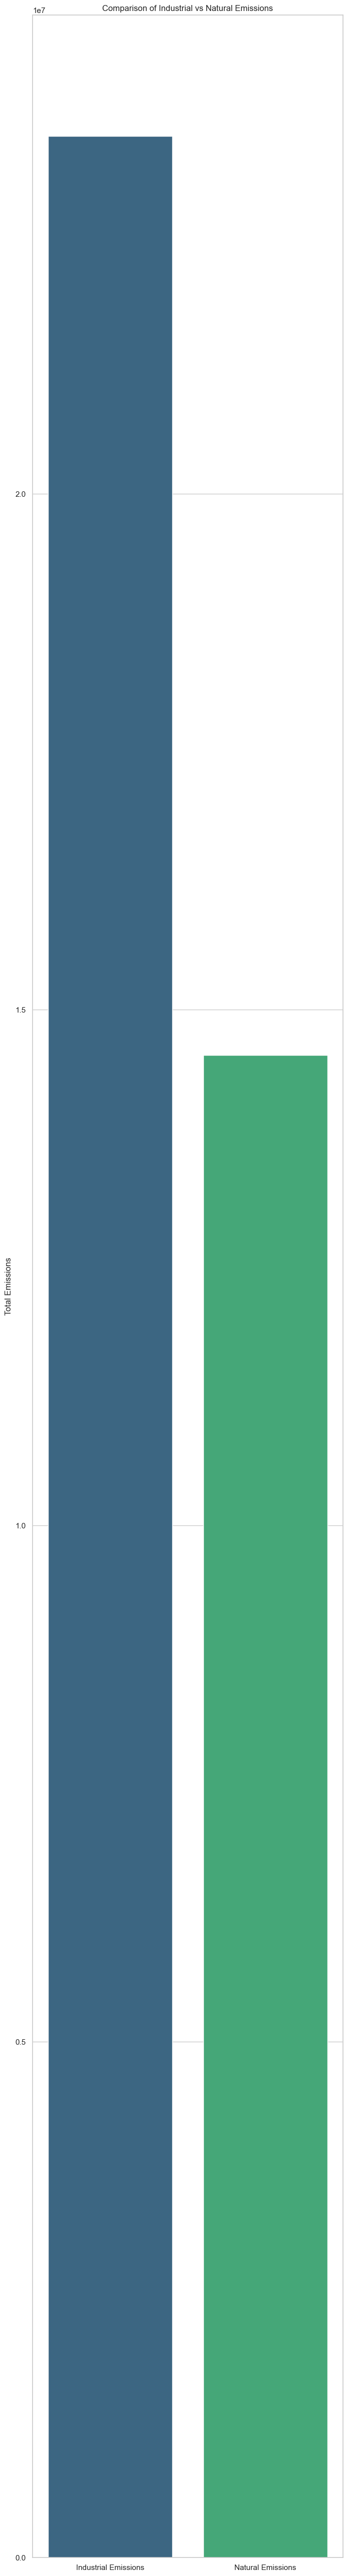

In [78]:
industrial_sources = agric_set[['pesticides_manufacturing', 'fertilizers_manufacturing']].sum()
natural_sources = agric_set[['forest_fires', 'savanna_fires']].sum()

industrial_vs_natural = pd.DataFrame({
    'Industrial Emissions': industrial_sources, 
    'Natural Emissions': natural_sources
}).sum()

# Let's plot_
plt.figure(figsize=(8, 66))
sns.barplot(x= industrial_vs_natural.index, y= industrial_vs_natural.values, palette= 'viridis')
plt.title('Comparison of Industrial vs Natural Emissions')
plt.ylabel('Total Emissions')
plt.show()

#### 5. What are the top industrial sources contributing to total emissions over time _?

#### 6. How do emissions from agricultural activities vary acrosss different regions _?

In [80]:
agric_set.to_csv("Agric-sector_cleaned_1.csv")

#### 6. Regresssion Models:

#### 7. Data Visualization:

#### 8. Results & Insights:

#### 9. Project Manager / Contributor:

Akona Ciko | Akona.Ciko@fnb.co.za | Gibit1 _(GitHub username)